### Preliminaries

In [1]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt

### Data Reading 

In [2]:
tweets_data_path = 'twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [3]:
print ('Total Tweets Count:{}'.format(len(tweets_data))) 

Total Tweets Count:79359


### Structuring the raw data

In [4]:
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet:tweet['text'] if 'text' in tweet else ' ', tweets_data)
tweets['lang'] = map(lambda tweet: tweet.get('lang', None), tweets_data)

- Drawing insights

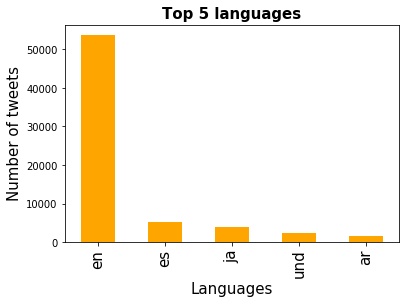

In [5]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange');
plt.savefig('top_5_langs.jpg',bbox_inches='tight', pad_inches=0.3)

### Mining Tweets based on Keywords

In [6]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [7]:
tweets['FIFA'] = tweets['text'].apply(lambda tweet: word_in_text('#FIFA', tweet))
tweets['WorldCup'] = tweets['text'].apply(lambda tweet: word_in_text('#WorldCup', tweet))

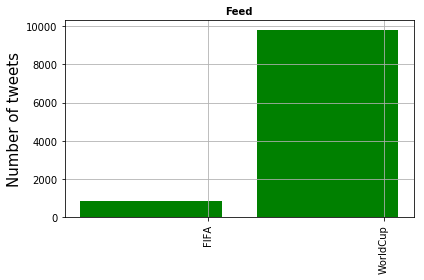

In [8]:
keywords = ['FIFA','WorldCup']
tweets_by_keywords = [tweets['FIFA'].value_counts()[True],tweets['WorldCup'].value_counts()[True]]
x = list(range(len(keywords)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x, tweets_by_keywords, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Feed', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x])
ax.set_xticklabels(keywords, rotation=90)
plt.grid()
plt.tight_layout()
plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)

In [9]:
#Counting Tweets
print ('Tweets with keyword FIFA: {}'.format(tweets['FIFA'].value_counts()[True]))
print ('Tweets with keyword WorldCup: {}'.format(tweets['WorldCup'].value_counts()[True]))

Tweets with keyword FIFA: 835
Tweets with keyword WorldCup: 9818


__Note__: 
Keywords used are:
- FIFA,World,Cup,football,FIFA World Cup,#FIFA2018,WorldCup,#WorldCup2018,#FifaWorldCup,#FIFAWorldCup,RUSKSA,#RUSKSA,prediction,win,#FIFA.
- Hence the total count is 79K+ .For simlplicity sake I have taken two keywords here.

***

### Targeted Selection

In [10]:
#Selecting HashTags of corrosponding teams from the fixture
tweets['#RUS'] = tweets['text'].apply(lambda tweet: word_in_text('#RUS', tweet))
tweets['#KSA'] = tweets['text'].apply(lambda tweet: word_in_text('#KSA', tweet))
tweets['Neutral'] = tweets['text'].apply(lambda tweet: word_in_text('#RUS', tweet) or word_in_text('#KSA', tweet) or word_in_text('#RUSKSA', tweet))

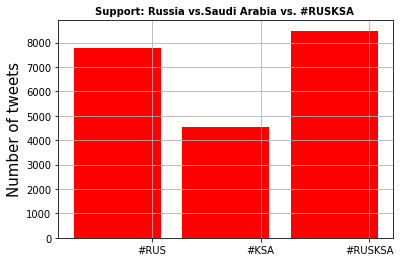

In [11]:
keywords= ['#RUS','#KSA','#RUSKSA']
tweets_by_keywords = [tweets[tweets['Neutral'] == True]['#RUS'].value_counts()[True], 
                      tweets[tweets['Neutral'] == True]['#KSA'].value_counts()[True], 
                      tweets[tweets['Neutral'] == True]['Neutral'].value_counts()[True]]
x = list(range(len(keywords)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x, tweets_by_keywords, width,alpha=1,color='r')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Support: Russia vs.Saudi Arabia vs. #RUSKSA ', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x])
ax.set_xticklabels(keywords)
plt.grid()
plt.savefig('Twitter_feed.jpg',bbox_inches='tight', pad_inches=0.3)

In [12]:
#Counting Tweets
print ('Russian Supporters:{}'.format(tweets['#RUS'].value_counts()[True]))
print ('Saudi Supporters:{}'.format(tweets['#KSA'].value_counts()[True]))
print ('Neutral:{}'.format(tweets['Neutral'].value_counts()[True]))

Russian Supporters:7796
Saudi Supporters:4527
Neutral:8488


***